# Week 1

Context information: The dataset I used is the Statlog Heart Disease dataset from Kaggle, which includes 14 features related to cardiovascular health. The chosen project was based on cardiovascular disease (CVD). This project examines data related to CVD in order to analyze healthcare utilization and risk factors. The dataset, Statlog Heart Disease, included medical attributes from 270 individuals. These included blood pressure, cholesterol, and heart rate, utilizing said data to predict the presence of heart disease. The project strived to discover trends in healthcare to identify key risk factors for cardiovascular disease and thus inform on new strategies for disease prevention and management.

In [17]:
!pip install statsmodels==0.14.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 165.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 42.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Heart_disease_statlog.csv')

In [38]:
print("Shape:", df.shape)
display(df.head())
display(df.describe())
print("\nMissing values:\n", df.isnull().sum())
print("\nColumn names:\n", df.columns)

Shape: (270, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000



Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Column names:
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [41]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("\nCategorical columns:\n", categorical_cols)
X = df.drop("target", axis=1)
y = df["target"]


Categorical columns:
 Index([], dtype='object')


Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
Continuous features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


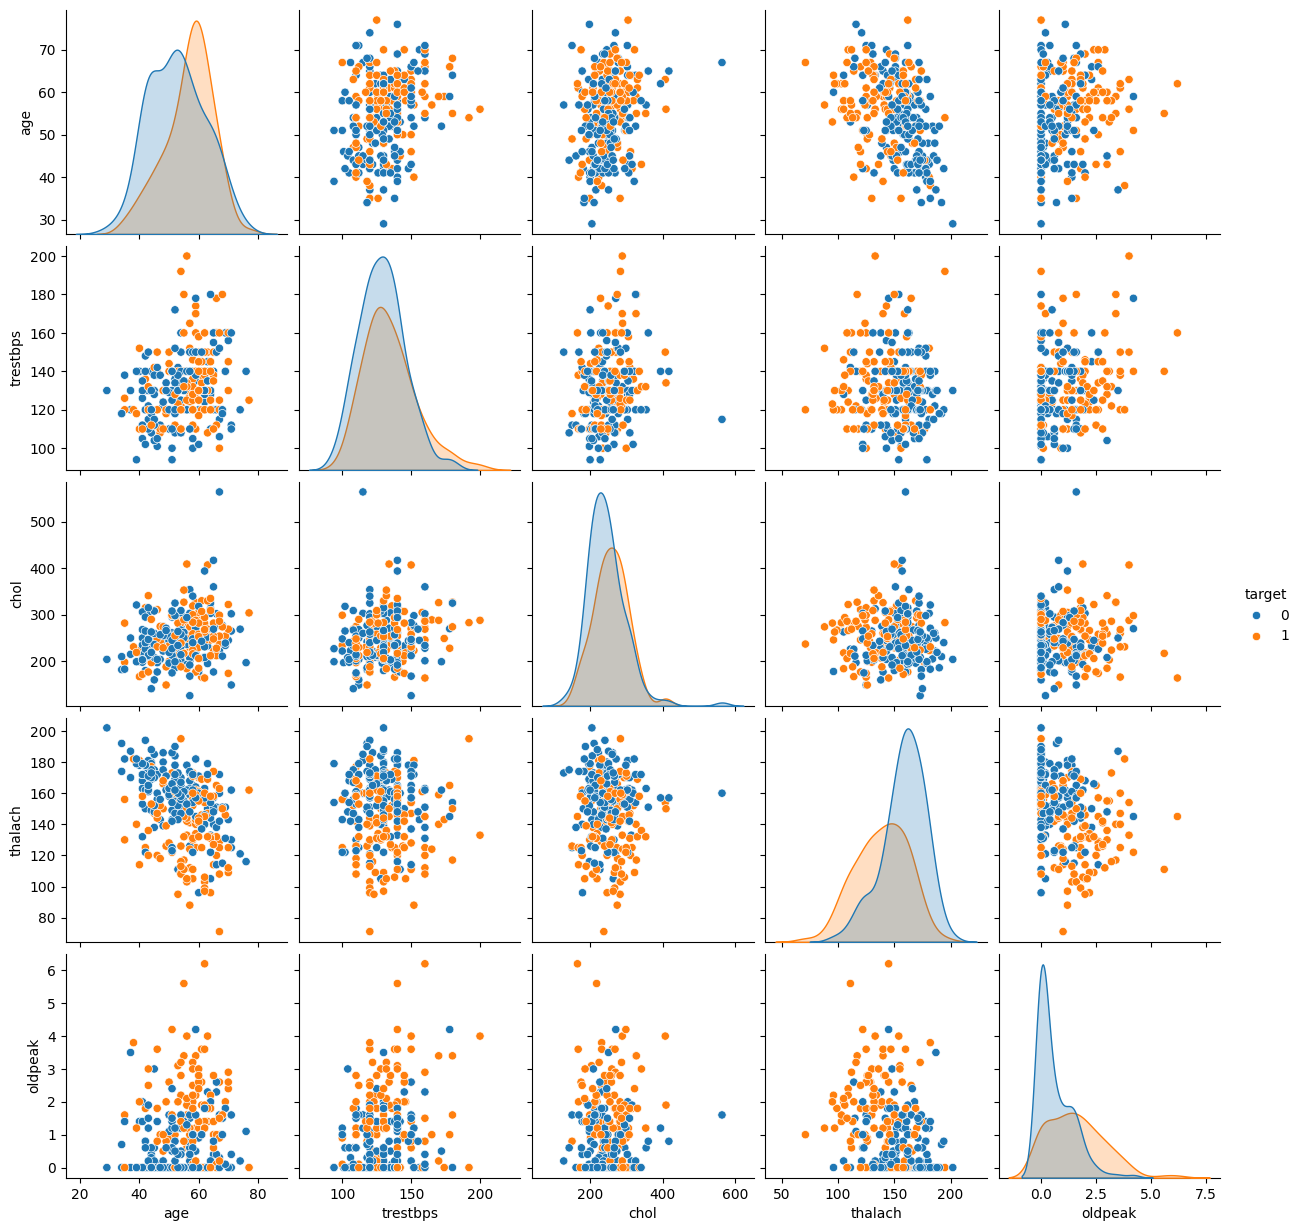

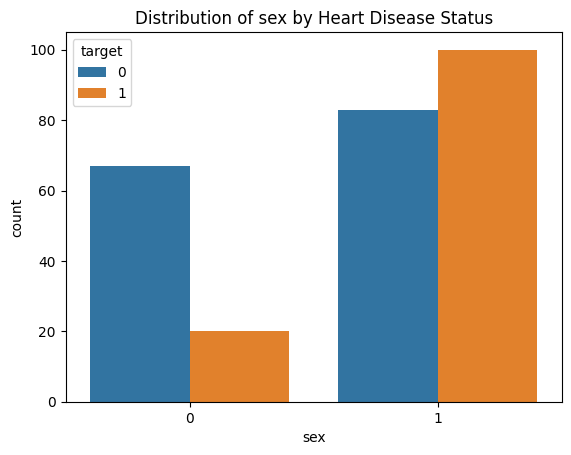

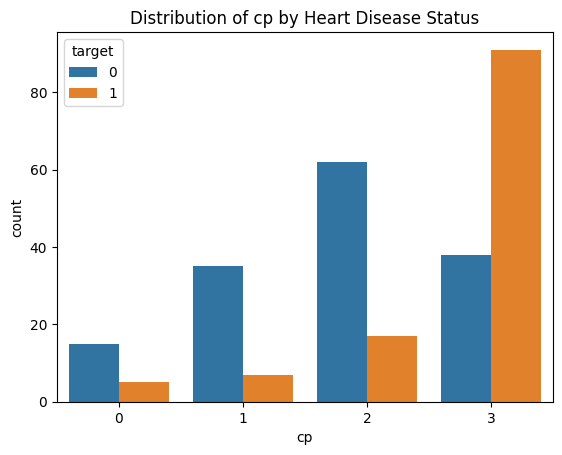

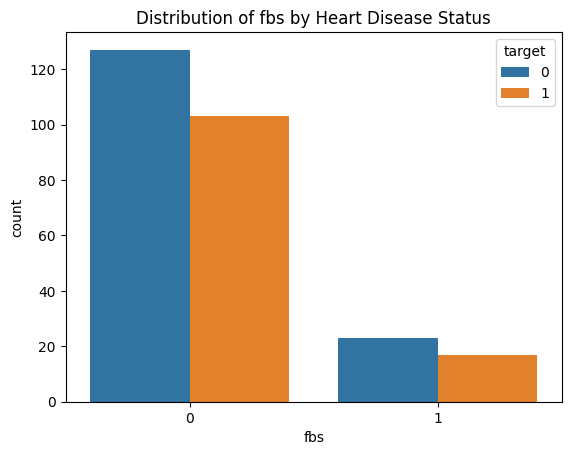

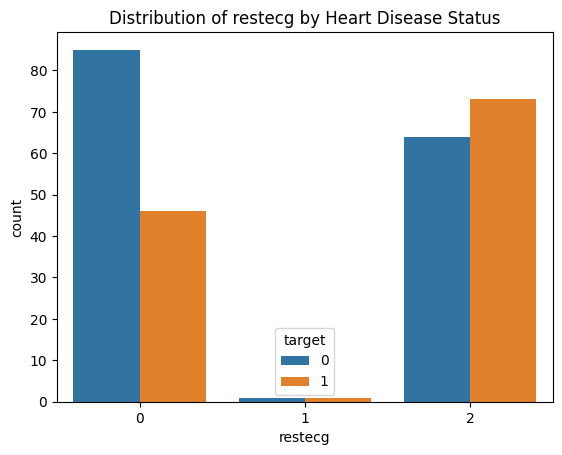

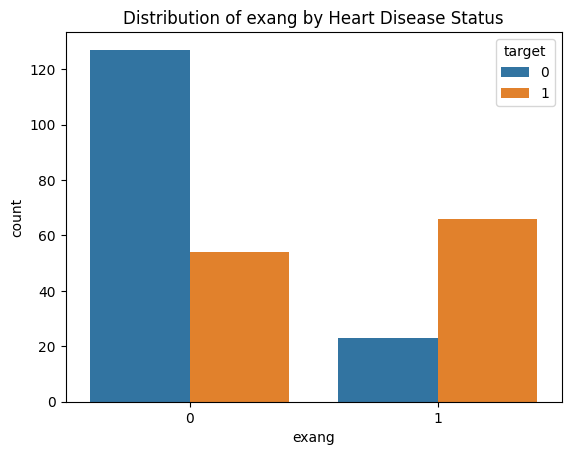

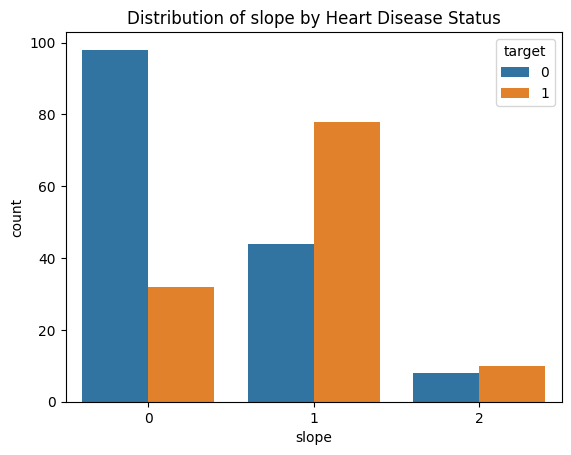

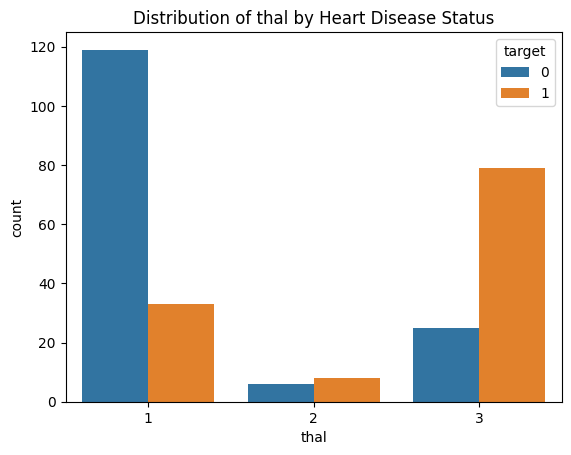

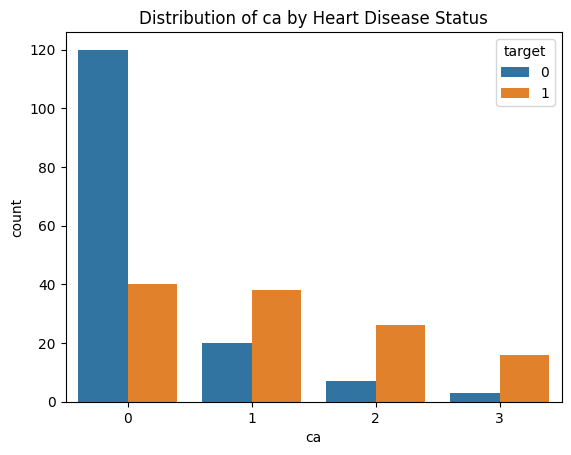

In [74]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
continuous_cols = [col for col in X.columns if col not in categorical_cols]

print("Categorical features:", categorical_cols)
print("Continuous features:", continuous_cols)

sns.pairplot(df[continuous_cols + ['target']], hue='target')
plt.show()

for col in categorical_cols:
    sns.countplot(data=df, x=col, hue='target')
    plt.title(f'Distribution of {col} by Heart Disease Status')
    plt.show()

Linear Regression

In [56]:
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_basic = LinearRegression()
lr_basic.fit(X_train, y_train)
y_pred_basic = lr_basic.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred_basic):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_basic)):.4f}")

R² Score: 0.5463
RMSE: 0.3284


Feature Importance

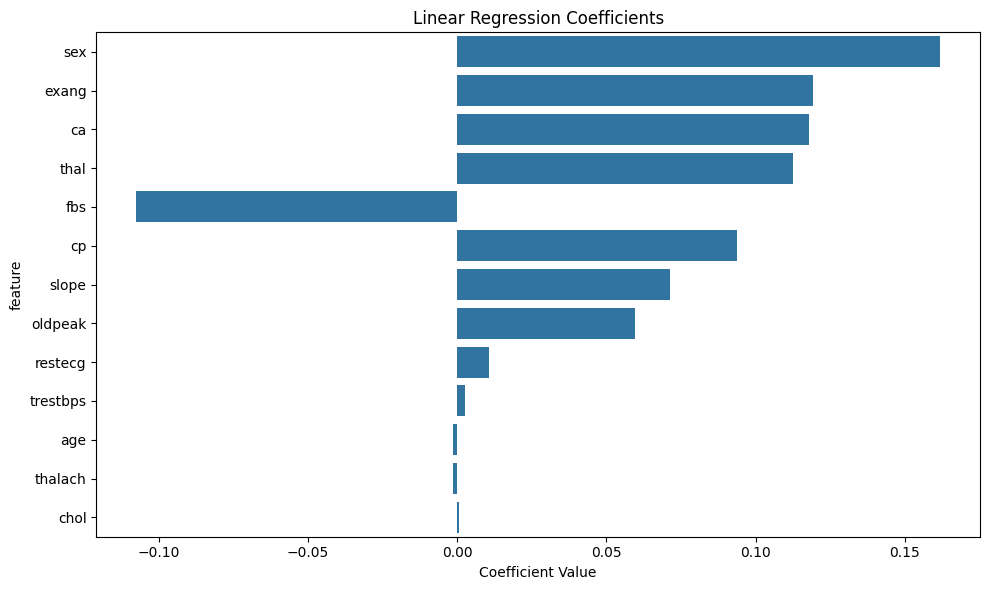


Feature Coefficients:


,feature,coefficient
1,sex,0.161722
8,exang,0.119082
11,ca,0.117961
12,thal,0.112534
5,fbs,-0.107529
2,cp,0.093904
10,slope,0.071434
9,oldpeak,0.059401
6,restecg,0.010489
3,trestbps,0.002637


In [59]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_basic.coef_
}).sort_values('coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='coefficient', y='feature')
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

print("\nFeature Coefficients:")
display(feature_importance)

Polynomial Regression

Degree 1: R² = 0.5463, RMSE = 0.3284, Features = 13
Degree 2: R² = -0.3318, RMSE = 0.5626, Features = 104
Degree 3: R² = -17.5634, RMSE = 2.1004, Features = 559


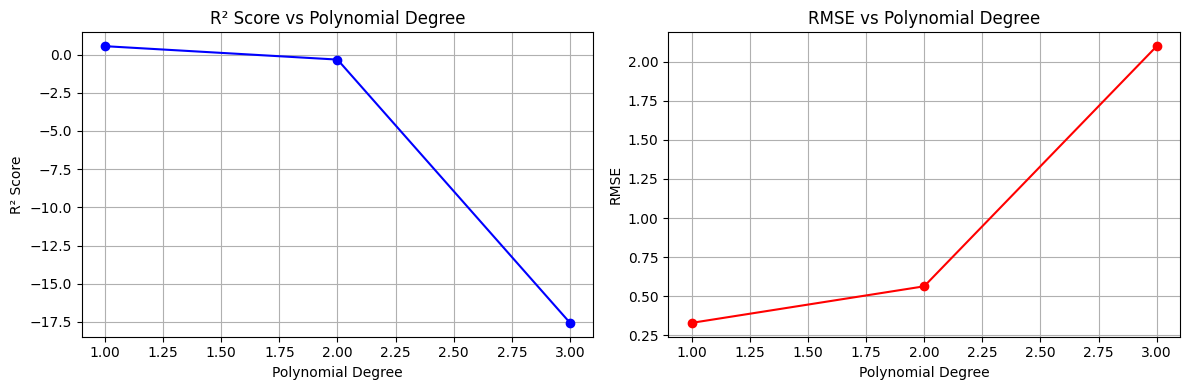

In [62]:
degrees = [1, 2, 3]
poly_results = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
        X_poly, y, test_size=0.2, random_state=42)
    
    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y_train_poly)
    y_pred_poly = lr_poly.predict(X_test_poly)
    
    r2 = r2_score(y_test_poly, y_pred_poly)
    rmse = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
    
    poly_results.append({
        'degree': degree,
        'r2_score': r2,
        'rmse': rmse,
        'n_features': X_poly.shape[1]
    })
    
    print(f"Degree {degree}: R² = {r2:.4f}, RMSE = {rmse:.4f}, Features = {X_poly.shape[1]}")

poly_df = pd.DataFrame(poly_results)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(poly_df['degree'], poly_df['r2_score'], 'bo-')
plt.title('R² Score vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(poly_df['degree'], poly_df['rmse'], 'ro-')
plt.title('RMSE vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.grid(True)
plt.tight_layout()
plt.show()

Interaction terms

In [65]:
from sklearn.preprocessing import PolynomialFeatures

key_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_key = df[key_features]

interaction_features = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interactions = interaction_features.fit_transform(X_key)

interaction_names = interaction_features.get_feature_names_out(key_features)
print(f"Created {len(interaction_names)} features including interactions")
print("Interaction terms created:")
for name in interaction_names:
    if ' ' in name:
        print(f"  {name}")

X_with_interactions = np.column_stack([X.values, X_interactions[:, len(key_features):]])

X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(
    X_with_interactions, y, test_size=0.2, random_state=42)

lr_interactions = LinearRegression()
lr_interactions.fit(X_train_int, y_train_int)
y_pred_int = lr_interactions.predict(X_test_int)

print(f"\nInteraction Model Results:")
print(f"R² Score: {r2_score(y_test_int, y_pred_int):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_int, y_pred_int)):.4f}")

Created 15 features including interactions
Interaction terms created:
  age trestbps
  age chol
  age thalach
  age oldpeak
  trestbps chol
  trestbps thalach
  trestbps oldpeak
  chol thalach
  chol oldpeak
  thalach oldpeak

Interaction Model Results:
R² Score: 0.5060
RMSE: 0.3426


Multicollinearity

VIF for Original Features:


,Feature,VIF
3,trestbps,59.662471
0,age,39.396699
7,thalach,33.609719
4,chol,27.652636
2,cp,7.399489
12,thal,6.863632
1,sex,3.795687
9,oldpeak,3.361422
10,slope,3.273120
6,restecg,2.230772


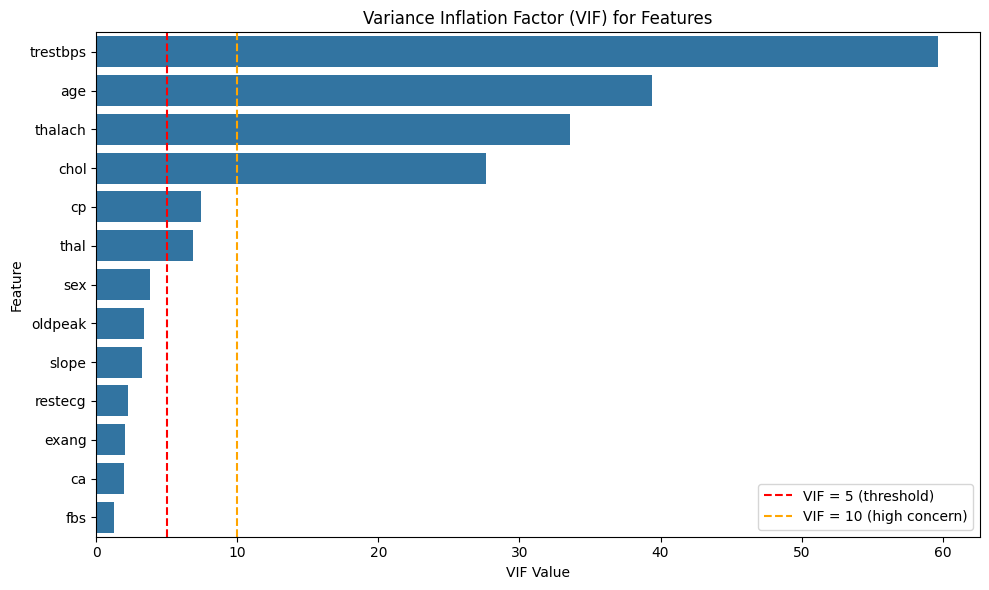


Features with VIF > 5: ['trestbps', 'age', 'thalach', 'chol', 'cp', 'thal']


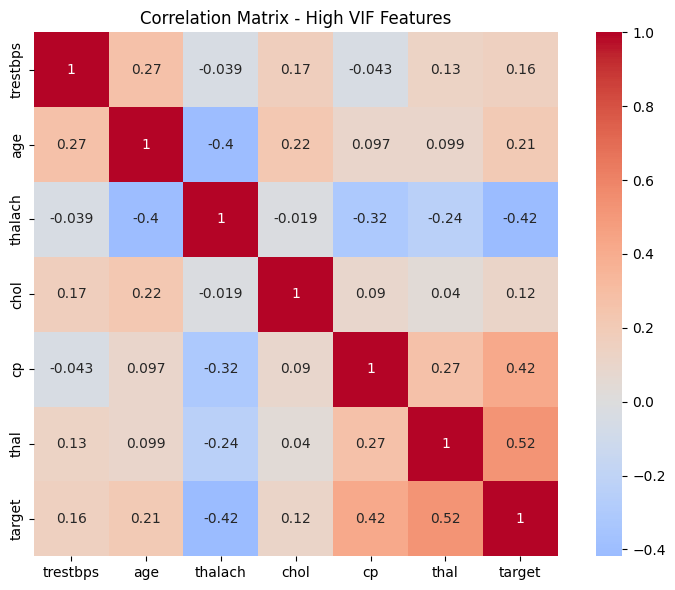

In [68]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) 
                       for i in range(len(df.columns))]
    return vif_data.sort_values('VIF', ascending=False)

vif_original = calculate_vif(X)
print("VIF for Original Features:")
display(vif_original)

# Visualize VIF
plt.figure(figsize=(10, 6))
sns.barplot(data=vif_original, x='VIF', y='Feature')
plt.title('Variance Inflation Factor (VIF) for Features')
plt.xlabel('VIF Value')
plt.axvline(x=5, color='red', linestyle='--', label='VIF = 5 (threshold)')
plt.axvline(x=10, color='orange', linestyle='--', label='VIF = 10 (high concern)')
plt.legend()
plt.tight_layout()
plt.show()

high_vif_features = vif_original[vif_original['VIF'] > 5]['Feature'].tolist()
print(f"\nFeatures with VIF > 5: {high_vif_features}")

if high_vif_features:
    plt.figure(figsize=(8, 6))
    high_vif_corr = df[high_vif_features + ['target']].corr()
    sns.heatmap(high_vif_corr, annot=True, cmap='coolwarm', center=0, square=True)
    plt.title('Correlation Matrix - High VIF Features')
    plt.tight_layout()
    plt.show()

 Categorical and Continuous Features

Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
Continuous features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Final dataset shape after encoding: (270, 13)


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,thal,ca
0,70,130,322,109,2.4,1,3,0,2,0,1,1,3
1,67,115,564,160,1.6,0,2,0,2,0,1,3,0
2,57,124,261,141,0.3,1,1,0,0,0,0,3,0
3,64,128,263,105,0.2,1,3,0,0,1,1,3,1
4,74,120,269,121,0.2,0,1,0,2,1,0,1,1


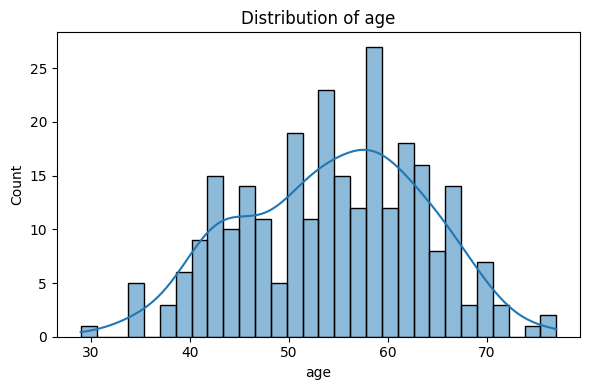

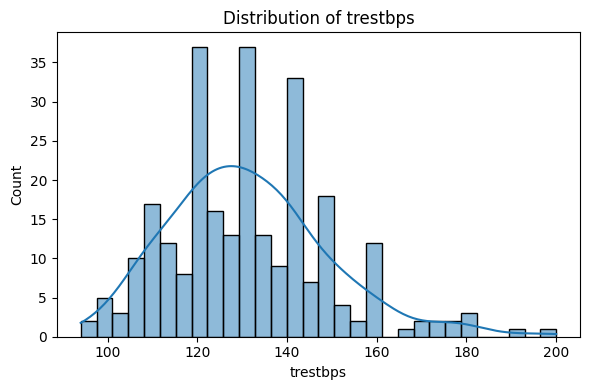

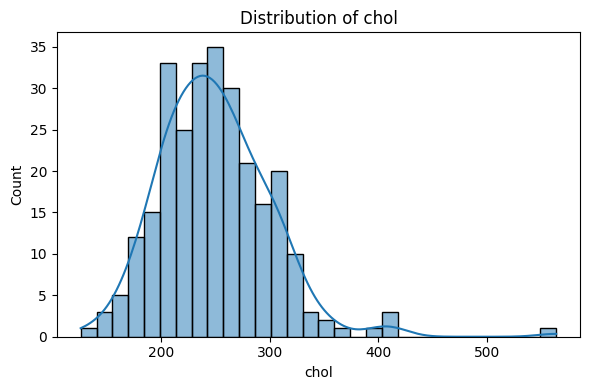

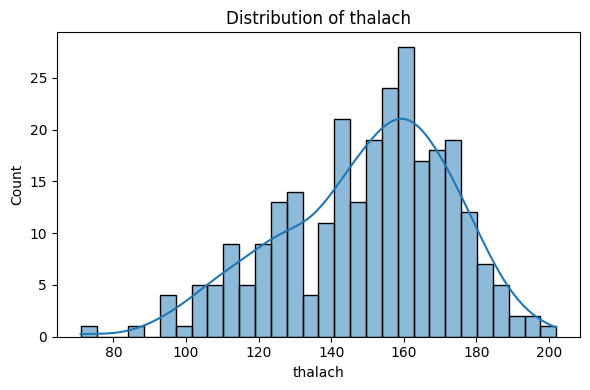

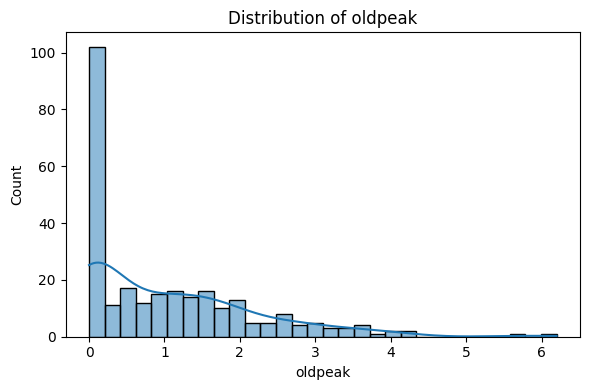

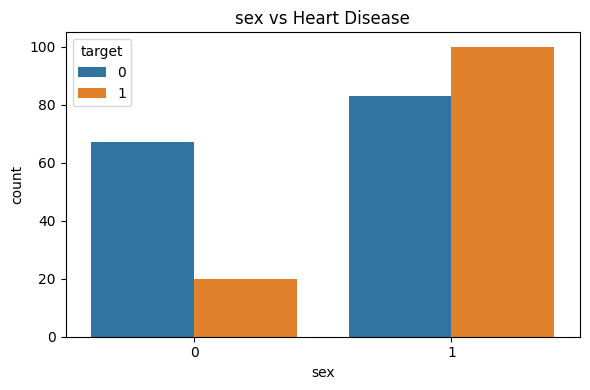

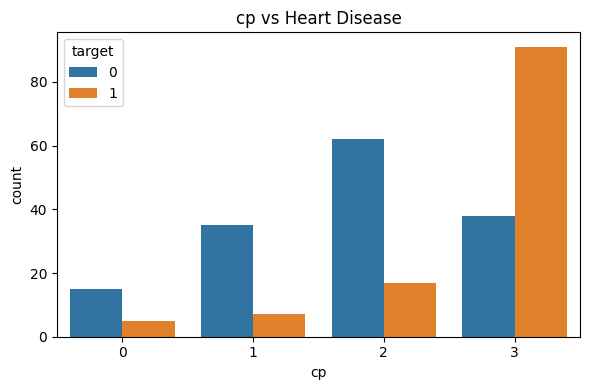

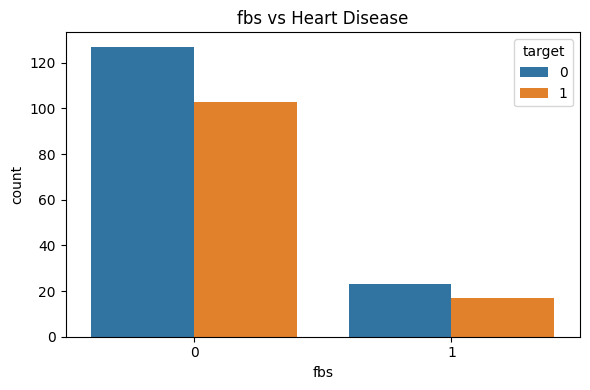

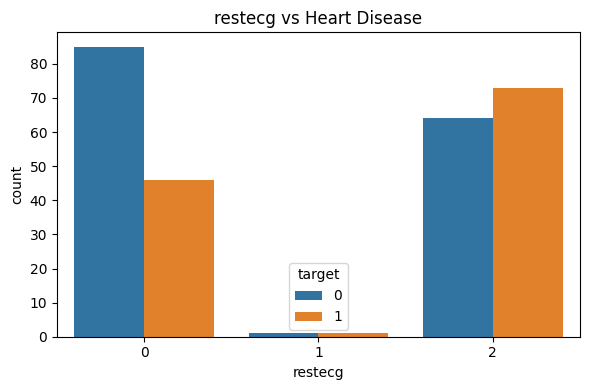

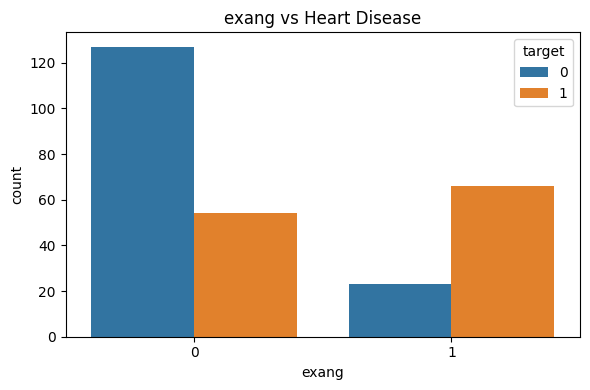

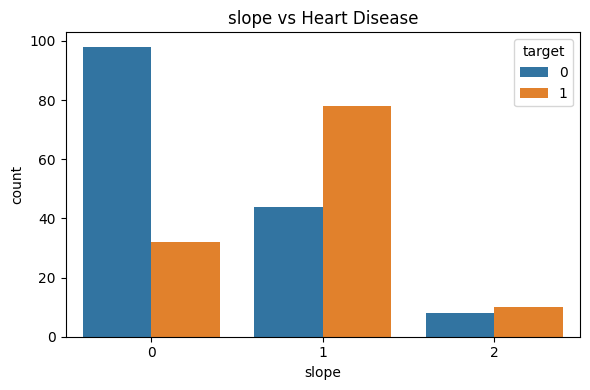

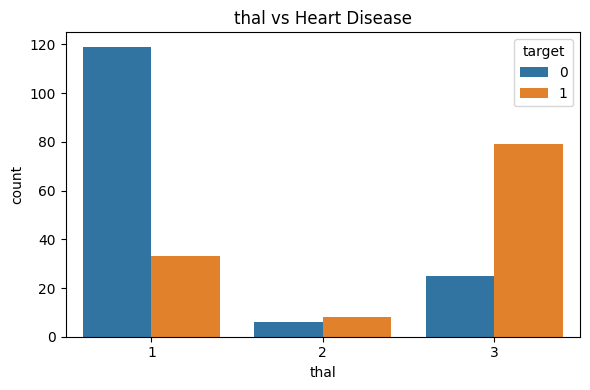

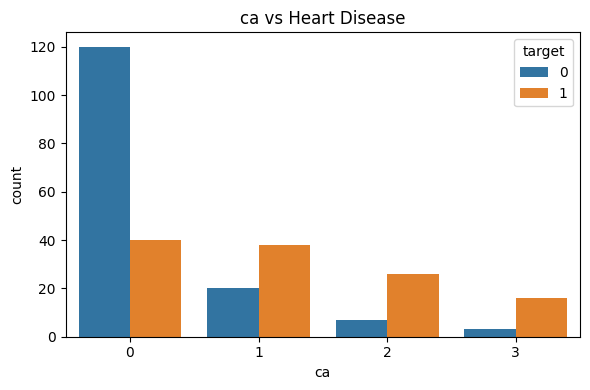

In [77]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
continuous_cols = [col for col in X.columns if col not in categorical_cols]

print("Categorical features:", categorical_cols)
print("Continuous features:", continuous_cols)

X_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)
X_continuous = df[continuous_cols]

X_final = pd.concat([X_continuous, X_encoded], axis=1)

print("\nFinal dataset shape after encoding:", X_final.shape)
display(X_final.head())

for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='target')
    plt.title(f'{col} vs Heart Disease')
    plt.tight_layout()
    plt.show()